<a href="https://colab.research.google.com/github/sanu1230/Academic-Project/blob/master/Case_study_Logistic_regression_model_to_predict_credit_card_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study: Logistic regression model to predict credit card default

## Business Objective 


The dataset consists of 10000 individuals and whether their credit card has defaulted or not. 

**Objective :**  

Predict whether the individual will default in their credit card payment.

Below are the column description:
- **default** : Whether the individual has defaulted
- **student** : Whether the individual is student
- **balance** : The average balance that the customer has remaining on their credit card after making their monthly payment
- **income** : Income of individual



## Load Dataset

In [ ]:
!pip -q install pandas_profiling==2.5.0

     |████████████████████████████████| 194kB 7.6MB/s 
     |████████████████████████████████| 10.4MB 16.1MB/s 
     |████████████████████████████████| 133kB 52.3MB/s 
     |████████████████████████████████| 614kB 51.2MB/s 
     |████████████████████████████████| 1.5MB 56.4MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 256kB 54.8MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 327kB 51.2MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 215kB 57.3MB/s 
     |████████████████████████████████| 747kB 46.0MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.22.0

In [ ]:
!pip freeze | grep pandas

pandas==0.25.3
pandas-datareader==0.8.1
pandas-gbq==0.11.0
pandas-profiling==2.5.0
sklearn-pandas==1.8.0


In [ ]:
#Download dataset
!wget -q https://www.dropbox.com/s/2ru004fjr6q13zm/default.csv

In [ ]:
!ls

default.csv  sample_data


In [ ]:
#Install Packages
!pip -q install imgaug==0.2.6
!pip -q install plotly-express
!pip -q install shap
!pip -q install eli5
!pip -q install lime

     |████████████████████████████████| 634kB 4.5MB/s 
     |████████████████████████████████| 276kB 8.5MB/s 
     |████████████████████████████████| 112kB 8.2MB/s 
     |████████████████████████████████| 276kB 7.8MB/s 


## Import Packages

In [ ]:
#Import basic packages

import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd               
import numpy as np
import pickle

from sklearn.model_selection import train_test_split   #splitting data
from pylab import rcParams
from sklearn.linear_model import LinearRegression         #linear regression
from sklearn.metrics.regression import mean_squared_error #error metrics
from sklearn.metrics import mean_absolute_error

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

%matplotlib inline     
sns.set(color_codes=True)




In [ ]:
# # Code for displaying plotly express plots inline in colab
# def configure_plotly_browser_state():
#   import IPython
#   display(IPython.core.display.HTML('''
#         <script src="/static/components/requirejs/require.js"></script>
#         <script>
#           requirejs.config({
#             paths: {
#               base: '/static/base',
#               plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
#             },
#           });
#         </script>
#         '''))
  
import plotly_express as px

## Read Data



### 1. Through Pandas

In [ ]:
# Read data through Pandas and compute time taken to read

t_start = time.time()
df_credit = pd.read_csv('default.csv')
t_end = time.time()
print('pd.read_csv(): {} s'.format(t_end-t_start)) # time [s]
df_credit.head()

pd.read_csv(): 0.020800113677978516 s


ImportError: ignored

  default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879

### 2. Through Dask

In [ ]:
# Read data through Dask and compute time taken to read

import dask.dataframe as dd

t_start = time.time()
df_dask = dd.read_csv('default.csv')
t_end = time.time()
print('dd.read_csv(): {} s'.format(t_end-t_start)) # time [s]
df_dask.tail()

dd.read_csv(): 0.01399683952331543 s


ImportError: ignored

     default student      balance        income
9995      No      No   711.555020  52992.378914
9996      No      No   757.962918  19660.721768
9997      No      No   845.411989  58636.156984
9998      No      No  1569.009053  36669.112365
9999      No     Yes   200.922183  16862.952321

**Observation**: Dask is almost 10 times faster than Pandas when reading files.

In [ ]:
df_credit.shape

(10000, 4)

In [ ]:
df_credit.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

### 3. Subsample into n rows

In [ ]:
# Sample n rows
n = 5000
df_credit = df_credit.sample(n)
df_credit

ImportError: ignored

     default student      balance        income
8176      No      No     0.000000  30818.511948
1144      No      No  1232.978729  57182.332117
6207      No      No   617.640764  37604.933564
3233      No     Yes   484.894317  15883.664431
5384      No      No   234.743604  27499.953622
...      ...     ...          ...           ...
4502      No     Yes  1509.663402  16777.562344
7236      No      No  1127.259556  47545.846804
2430      No      No   561.433746  37884.961104
4511      No     Yes   987.154096  13002.485551
8638      No      No  1256.186730  31706.178562

[5000 rows x 4 columns]

## Exploratory Data Analysis

### Let's look into summary statistics

In [ ]:
#Let's look into the total number of columns and observations in the dataset
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 8176 to 8638
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  5000 non-null   object 
 1   student  5000 non-null   object 
 2   balance  5000 non-null   float64
 3   income   5000 non-null   float64
dtypes: float64(2), object(2)
memory usage: 195.3+ KB


In [ ]:
#Let's look into summary statistics of data
df_credit.describe()

ImportError: ignored

           balance        income
count  5000.000000   5000.000000
mean    836.682014  33680.933658
std     489.634786  13171.095276
min       0.000000   2541.200814
25%     477.562803  21675.144926
50%     826.155629  34944.945145
75%    1176.508760  43719.300690
max    2654.322576  73554.233495

### Data Cleaning

#### Pandas profiling

In [ ]:
#Perform Pandas profiling to understand quick overview of columns

import pandas_profiling
report = pandas_profiling.ProfileReport(df_credit)
#covert profile report as html file
report.to_file("credit_data.html")

ImportError: ignored

In [ ]:
from IPython.display import display,HTML,IFrame

display(HTML(open('credit_data.html').read()))

**Observation:**
- From Pandas profiling we understand there are no null values in any of the columns.

In [ ]:
# count the number of NaN values in each column
print(df_credit.isnull().sum())

In [ ]:
#The datatypes have now been changed
df_credit.info()

### Data Visualization

#### Let's analyze the distribution of balance when a customer defaults or does not default

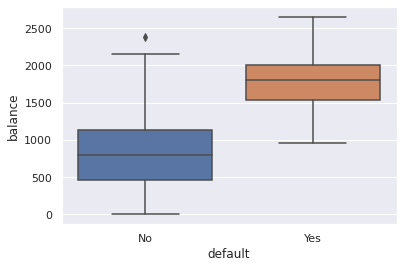

In [ ]:
# Relation between balance and default
%matplotlib inline
sns.boxplot(x='default', y='balance', data=df_credit)
plt.show()

**Observation:** People who have more balance have defaulted more in their credit card payments.

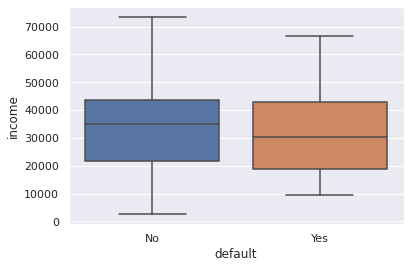

In [ ]:
# Relation between income and default

sns.boxplot(x='default', y='income', data=df_credit)
plt.show()

**Observation:** There is not much relation between income and whether they have defaulted in their credit card payments.

#### Relation between balance and income and whether they have defaulted or not 

In [ ]:
# configure_plotly_browser_state()
px.scatter(df_credit, x="income", y="balance" ,color="default",
           hover_data=["student"], log_x=True, size_max=60)

**Observation**:People who have more balance have more defaults.

In [ ]:
# Relation between Student and default

pd.crosstab(df_credit['default'], df_credit['student'], rownames=['Default'], colnames=['Student'])

ImportError: ignored

Student    No   Yes
Default            
No       3467  1360
Yes       109    64

#### Correlation between selected variables

The heat map produces a correlation plot between variables of the dataframe.

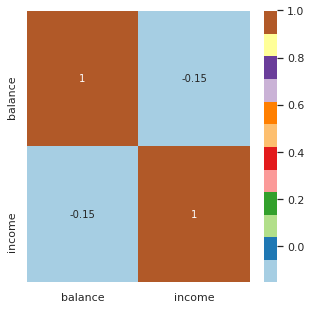

In [ ]:
plt.figure(figsize=(5,5))
c = df_credit.corr()
sns.heatmap(c, cmap='Paired', annot=True)

**Observation**: The heat map illustrates that income and balance are negatively correlated.

#### Explore how often a student defaults

In [ ]:
# configure_plotly_browser_state()
px.box(df_credit, x="default", y="income", color="student",hover_data=['balance'],notched=True)

**Observation:** 

- Student defaulters are lesser as compared to others

In [ ]:
#@title Save
df_credit1 = df_credit.copy()

In [ ]:
#@title Restore save
df_credit = df_credit1.copy()

## Model Building

###  Prepare the Data for model building

#### Perform one-hot encoding for categorical variables

In [ ]:
#Select the variables to be one-hot encoded
one_hot_features = ['student', 'default']
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(df_credit[one_hot_features],drop_first=True)
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

# Convert Categorical to Numerical for default column


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 8176 to 8638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_Yes  5000 non-null   uint8
 1   default_Yes  5000 non-null   uint8
dtypes: uint8(2)
memory usage: 48.8 KB


In [ ]:
# Replacing categorical columns with dummies
fdf = df_credit.drop(one_hot_features,axis=1)
fdf = pd.concat([fdf, one_hot_encoded] ,axis=1)
fdf.head()

ImportError: ignored

          balance        income  student_Yes  default_Yes
8176     0.000000  30818.511948            0            0
1144  1232.978729  57182.332117            0            0
6207   617.640764  37604.933564            0            0
3233   484.894317  15883.664431            1            0
5384   234.743604  27499.953622            0            0

In [ ]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 8176 to 8638
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   balance      5000 non-null   float64
 1   income       5000 non-null   float64
 2   student_Yes  5000 non-null   uint8  
 3   default_Yes  5000 non-null   uint8  
dtypes: float64(2), uint8(2)
memory usage: 127.0 KB


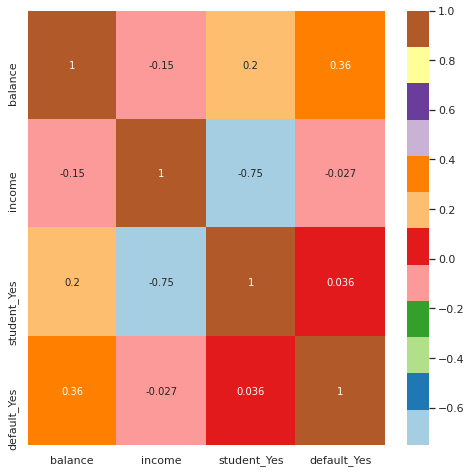

In [ ]:
plt.figure(figsize=(8, 8))
c = fdf.corr()
sns.heatmap(c,cmap='Paired',annot=True)

**Observation**
- We still see high correlation between income & student_Yes.

In [ ]:
#Lets Try droping one of the high correlated feature
# fdf = fdf.drop('student_Yes', 1)
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 8176 to 8638
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   balance      5000 non-null   float64
 1   income       5000 non-null   float64
 2   student_Yes  5000 non-null   uint8  
 3   default_Yes  5000 non-null   uint8  
dtypes: float64(2), uint8(2)
memory usage: 127.0 KB


#### Standardization

In [ ]:
#Standardize rows into uniform scale

X = fdf.drop(['default_Yes'],axis=1)
y = fdf['default_Yes']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Scale and center the data
fdf_normalized = scaler.transform(X)

# Create a pandas DataFrame
X = pd.DataFrame(data=fdf_normalized, index=X.index, columns=X.columns)





#### Split the data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.3)

### Train the model

In [ ]:

# Building the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1)                            # Set Large C value for low regularization to prevent overfitting
logreg.fit(X_train, y_train)

print(logreg.coef_)                                            # Coefficients for Logistic Regression
print(logreg.intercept_)

[[ 2.93130338  0.03711923 -0.32579058]]
[-6.34540521]


In [ ]:
X.columns

Index(['balance', 'income', 'student_Yes'], dtype='object')

ImportError: ignored

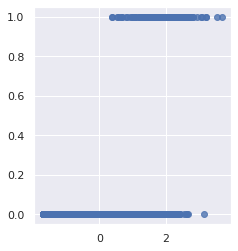

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot2grid((1, 3), (0,0))
sns.regplot(x=X_train['balance'], y=y_train, data=(X_train, y_train), logistic=True)
plt.subplot2grid((1, 3), (0,1))
sns.regplot(x=X_train['income'], y=y_train, data=(X_train, y_train), logistic=True)
plt.subplot2grid((1, 3), (0,2))
sns.regplot(x=X_train['student_Yes'], y=y_train, data=(X_train, y_train), logistic=True)

### Test the model

In [ ]:
# now applying our learnt model on test and also on train data

y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

In [ ]:
y_pred_test.shape

(1500,)

In [ ]:
y_test.shape

(1500,)

### Metrics of the model

#### Accuracy of the model

In [ ]:
from sklearn import metrics
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

Test Accuracy:  0.9686666666666667


In [ ]:
# comparing the metrics of predicted lebel and real label of test data
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))

Train Accuracy:  0.9745714285714285


#### Null Accuracy

In [ ]:
# Actual Values of y_test
y_test.value_counts()
y_test.value_counts()[0]/len(y_test)

0.9646666666666667

**The null accuracy is 96.67%. There is only a slight improvement in accuracy for our model from the baseline model.**

Accuracy is not an appropriate metric in this scenario. We employ confusion matrix and ROC curve to further understand performance of our model on test data.

#### Confusion Matrix

In [ ]:
conf=metrics.confusion_matrix(y_test, y_pred_test)

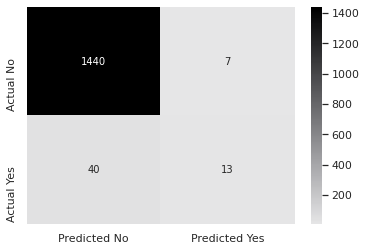

In [ ]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'], annot=True,
            fmt='d')

In [ ]:
df_credit.shape

(5000, 4)

In [ ]:
# Creating Classification Report

cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1447
           1       0.65      0.25      0.36        53

    accuracy                           0.97      1500
   macro avg       0.81      0.62      0.67      1500
weighted avg       0.96      0.97      0.96      1500



#### Imbalanced Data

The above metrics illustrate there is a clear imbalance in data.

Let us retrain our data using logistic regression this time using a parameter called 'balanced' which would handle imbalance in the data by changing the threshold set by logistic regression model:

In [ ]:
# Building the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e42,class_weight='balanced')                            # Set Large C value for low regularization to prevent overfitting
logreg.fit(X_train, y_train)

print(logreg.coef_)                                            # Coefficients for Logistic Regression
print(logreg.intercept_)

[[ 3.05445912  0.00918715 -0.25230887]]
[-3.17268312]


In [ ]:
# now applying our learnt model on test and also on train data

y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

In [ ]:
from sklearn import metrics
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

Test Accuracy:  0.8733333333333333


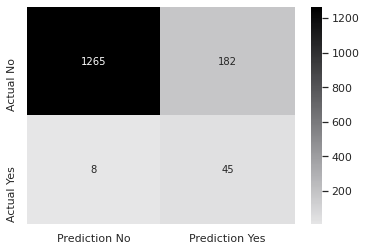

In [ ]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_pred_test)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [ ]:
# Creating Classification Report

cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1447
           1       0.20      0.85      0.32        53

    accuracy                           0.87      1500
   macro avg       0.60      0.86      0.63      1500
weighted avg       0.97      0.87      0.91      1500



#### ROC Curve

In [ ]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

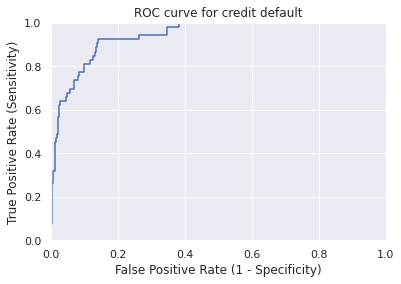

In [ ]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for credit default')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## Model Explainability

### LIME

In [ ]:
# Import lime package
import lime
import lime.lime_tabular

#Find caegorical features
categorical_features = np.argwhere(np.array([len(set(X_test.values[:,x])) for x in range(X_test.values.shape[1])]) <= 10).flatten()
#Lime explainer for regression
explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values,
feature_names=X_test.columns.values.tolist(),
class_names=['default'],
categorical_features=categorical_features,
verbose=True, mode='regression')
ind = 4
#Fit on test data
exp = explainer.explain_instance(X_test.values[ind], logreg.predict, num_features=3)
#Show in notebook features influencing predictions
exp.show_in_notebook(show_table=True)

Intercept 0.01113732126858144
Prediction_local [0.7497368]
Right: 0


### ELI5

In [ ]:
# Import Eli5 package
import eli5
from eli5.sklearn import PermutationImportance

# Find the importance of columns for prediction
perm = PermutationImportance(logreg, random_state=1).fit(X_test,y_pred_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Using TensorFlow backend.


Weight,Feature
0.2604 ± 0.0105,balance
0.0168 ± 0.0035,student_Yes
0.0013 ± 0.0008,income


In [ ]:
#Understanding how each feature influences the prediction
eli5.show_prediction(logreg, doc=X_test.iloc[[ind]], feature_names=list(X_test.columns))

### SHAP

In [ ]:
#Import SHAP package
import shap

#Create explainer for linear model
explainer = shap.LinearExplainer(logreg,data=X_test.values)
shap_values = explainer.shap_values(X_test)

In [ ]:
#Understanding how each feature influences the prediction

shap.initjs()
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test.iloc[ind,:],
    feature_names=X_test.columns.tolist()
)

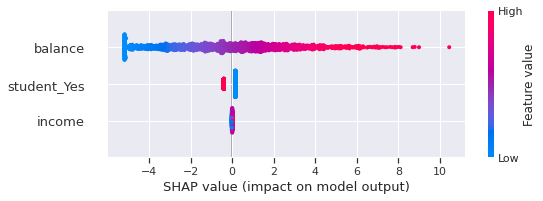

In [ ]:

shap.summary_plot(shap_values,X_test)


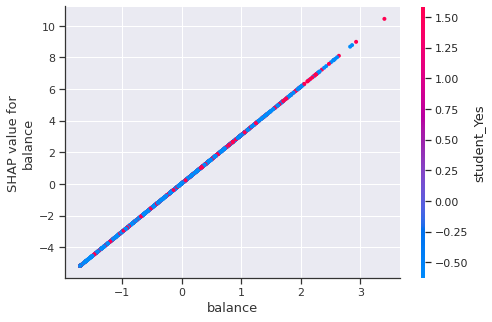

In [ ]:
shap.dependence_plot("balance", shap_values, X_test)